# Welcome to WESTPA! #

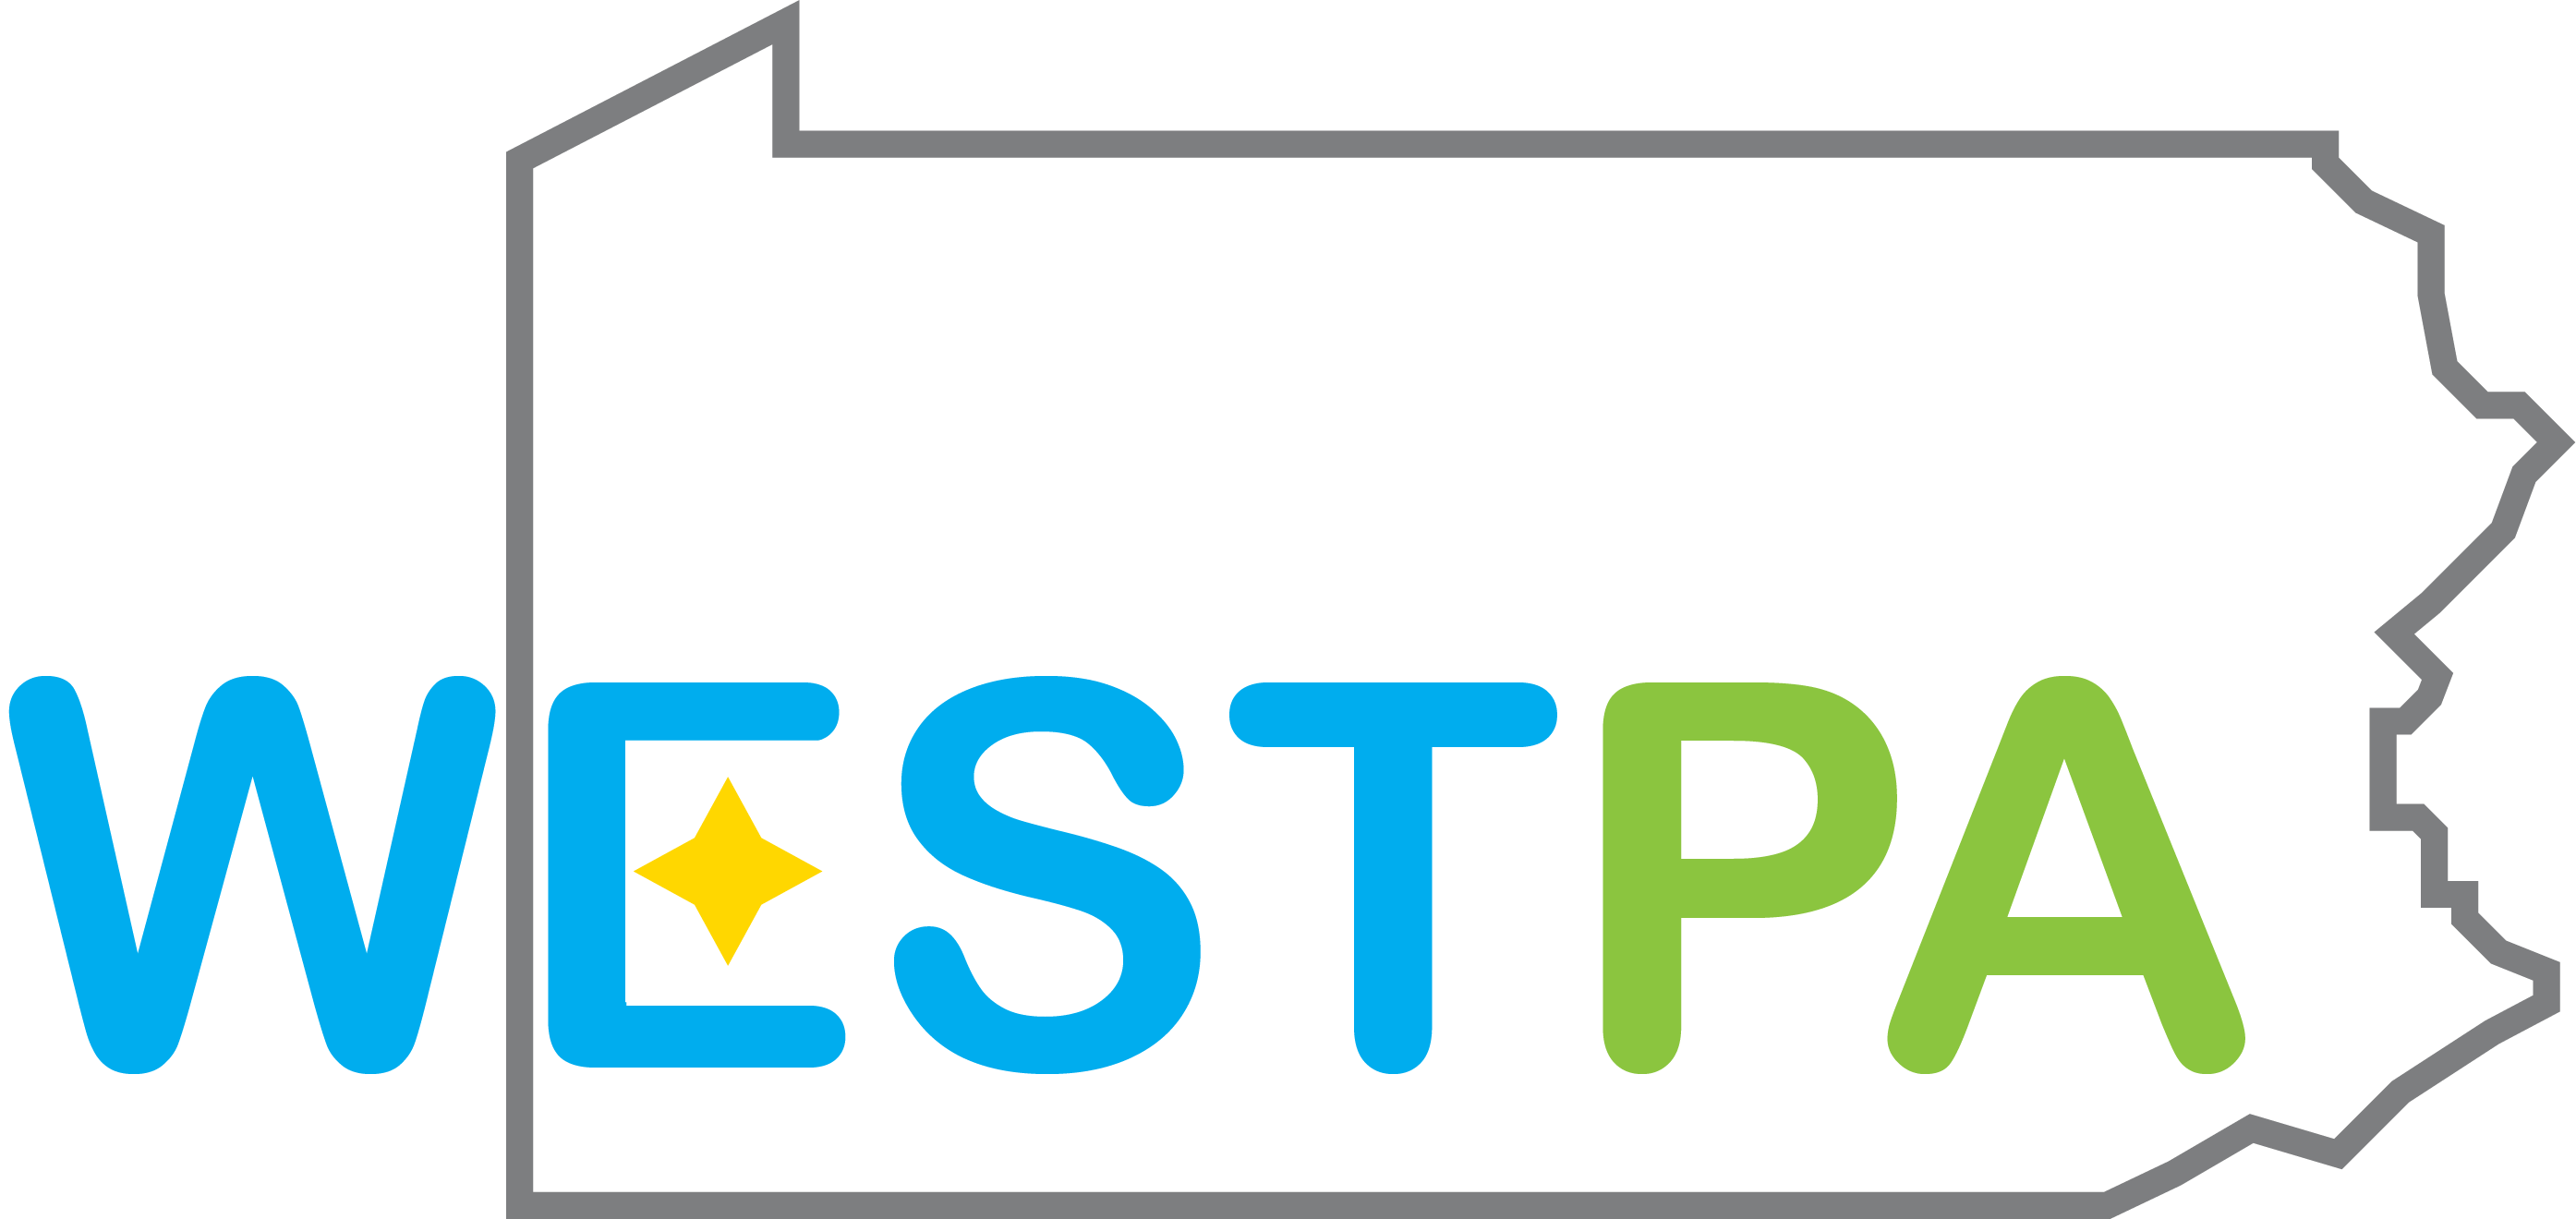

## west.cfg ##
The <font color=blue>west.cfg</font> file in WESTPA specifies main weighted-ensemble simulation parameters.

In [36]:
from ipywidgets import *
import ipywidgets as widgets
from IPython.display import display
import os

In [2]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

In [3]:
 def replacecfg(values):
        with open('.west_temp.cfg', 'r') as file:
            filedata = file.read()
            
        things_to_replace = ['NUM', 'DIM', 'LEN', 'CNT', 'WCT']
        
        for i in enumerate(things_to_replace):
            index = i[0]
            filedata = filedata.replace(i[1], values[index])

        with open('west.cfg', 'w') as file:
            file.write(filedata)

In [4]:
def replaceInput(values1):
        with open('.amber_temp.in', 'r') as file:
            filedata = file.read()

        things_to_replace = ['DT','STP', 'NMS']
        
        for i in enumerate(things_to_replace):
            index = i[0]
            filedata = filedata.replace(i[1], values1[index])

        with open('md.in', 'w') as file:
            file.write(filedata)

In [5]:
def search(search_word):
    with open('west.cfg') as file:
        for num, line in enumerate(file,1):
            if search_word in line:
                return num

# needs to return line number of "datasets:" keyword

In [6]:
def i(Iterations):
    display(Iterations)
    return Iterations
def d(Dimension):
    display(Dimension)
    return Dimension
def l(Length):
    display(Length)
    return Length
def c(Count):
    display(Count)
    return Count
def t(Time):
    display(Time)
    return Time
def n(Datasets):
    display(Datasets)
    return Datasets
def na(Name):
    display(Name)
    return Name
def ta(Tau):
    display(Tau)
    return Tau
def dt(Dt):
    display(Dt)
    return Dt
hide_toggle()

### number_of_iterations ###

The number of weighted-ensemble iterations is specified by the variable <font color=blue>number_of_iterations</font>. Once the init.sh file is run, a new simulation will begin and continue until the number of iterations specified has been completed.

In [7]:
number_of_iterations = interactive(i, Iterations = "100")
display(number_of_iterations)

interactive(children=(Text(value='100', description='Iterations'), Output()), _dom_classes=('widget-interact',…

### pcoord_dimension ###
The dimensionality of the progress coordinate is represented by the variable <font color=blue>pcoord_dimension</font>. As review, it is recommended that the progress coordinate is chosen to monitor the slowest relevant motion(s). For example, in systems in which the binding partners involve ensembles of conformations, a pure distance-based progress coordinate will not be adequate and must be combined with a second dimension of the progress coordinate that tracks some other motion of the system (for more complex processes).

A progress coordinate with multiple dimensions represents the heirarchical nesting of bins inside of other bins. Thus, additional dimensions in the progress coordinate greatly increase the number of bins and hence the cost of the WE run.

In [8]:
pcoord_dimension = interactive(d, Dimension = "1")
display(pcoord_dimension)

interactive(children=(Text(value='1', description='Dimension'), Output()), _dom_classes=('widget-interact',))

### pcoord_length ###
The number of data points per iteration is represented by the variable <font color=blue>pcoord_length</font>. This is determined by the frequency at which the progress coordinate is being calculated.

In [9]:
pcoord_length = interactive(l, Length = "50")
display(pcoord_length)

interactive(children=(Text(value='50', description='Length'), Output()), _dom_classes=('widget-interact',))

### bin_target_counts ###
The target number of trajectories per bin, or the number of walkers per bin, is represented by the variable <font color=blue>bin_target_counts</font>. A larger value results in more consistent runs, while a smaller value allows for longer runs and more replicates.

The τ value and the number of trajectories per bin is coupled to the choice of progress coordinate and binning scheme.

In [10]:
bin_target_counts = interactive(c, Count = "4")
display(bin_target_counts)

interactive(children=(Text(value='4', description='Count'), Output()), _dom_classes=('widget-interact',))

### max_wallclock_time ###
The max run time having elapsed between the start of the simulation and "now" is represented by the variable <font color=blue>max_wallclock_time</font>. This variable is specified in hours.

In [11]:
max_wallclock_time = interactive(t, Time = "24")
display(max_wallclock_time)

interactive(children=(Text(value='24', description='Time'), Output()), _dom_classes=('widget-interact',))

Run the individual cell below to update the <font color=blue>west.cfg</font> with the desired simulation parameters.

In [13]:
values = []
values.append(str(number_of_iterations.result))
values.append(str(pcoord_dimension.result))
values.append(str(pcoord_length.result))
values.append(str(bin_target_counts.result))
values.append(str(max_wallclock_time.result))

replacecfg(values)

In [15]:
names = interactive(na, Name = "pcoord")
display(names)

interactive(children=(Text(value='pcoord', description='Name'), Output()), _dom_classes=('widget-interact',))

Run the individual cell below to add datasets to the <font color=blue>west.cfg</font>.

In [16]:
names_list = names.result
names_list = names_list.split(", ")

line_number = search("datasets:") 
for num, i in enumerate(names_list,1):
    file = open("west.cfg", "r")
    contents = file.readlines()
    file.close()

    contents.insert(line_number + num, "      - name:        " + str(i) + "\n")

    file = open("west.cfg", "w")
    contents = "".join(contents)
    file.write(contents)
    file.close()

## md.in
The <font color=blue>md.in</font> file represents the input file for a molecular dynamics simulation, specifying conditions for dynamic propagation.

### τ
Procedurally, weighted ensemble runs a large number of ordinary, unbiased MD trajectory segments in parallel, with each segment halted and examined after a short period of time in picoseconds, known as τ.

In [17]:
tau = interactive(ta, Tau = "10")
display(tau)

interactive(children=(Text(value='10', description='Tau'), Output()), _dom_classes=('widget-interact',))

### dt
The timestep of integration is represented by the variable <font color=blue>dt</font>.

In [18]:
dt = interactive(dt, Dt = "0.002")
display(dt)

interactive(children=(Text(value='0.002', description='Dt'), Output()), _dom_classes=('widget-interact',))

### nstlim
Essentially, the input as a measure of time for the MD simulation is represented by <font color=blue>nstlim</font>. In other words, it is the number of steps, or the times the molecular dynamics engine is going to integrate Newton's Second Law of Motion.

### ntwx
Amber saves the coordinates of all atoms in the system after a number of steps, which is represented by the variable <font color=blue>ntwx</font>.

In [19]:
nstlim = int(float(tau.result) / float(dt.result)) #timestep for integration is 0.002 picoseconds currently
ntwx = int(nstlim / float(pcoord_length.result))

Run cell below.

In [20]:
values1 = []
values1.append(str(dt.result))
values1.append(str(nstlim))
values1.append(str(ntwx))

replaceInput(values1)

In [39]:
os.listdir(".")

['WESTPA.ipynb',
 'west.cfg',
 '.init.temp',
 '.amber_temp.in',
 'md.in',
 'init.sh',
 'bstates',
 'westpa_scripts',
 'tstate.file',
 'run.sh',
 'README.md',
 '.west_temp.cfg',
 'env.sh',
 '.ipynb_checkpoints',
 'common_files']

In [65]:
def getbstatesfile():
    for file in os.listdir("./bstates"):
        if file.endswith(".rst"):
            filename = os.path.join("./bstates", file)
            os.rename(filename, './bstates/bstate.rst')

In [66]:
def gettopfile(): 
    for file in os.listdir("./common_files"):
        if file.endswith(".top"):
            filename = os.path.join("./common_files", file)
            os.rename(filename, './common_files/system.top')

In [67]:
mode = widgets.Dropdown(
    options=['Steady State', 'Equilibrium'],
    value='Steady State',
    description='Mode:',
    disabled=False,
)

In [68]:
display(mode)

Dropdown(description='Mode:', options=('Steady State', 'Equilibrium'), value='Steady State')

Run the cell below to write the init.sh file.

In [71]:
def writeinit(mode):
    filedata = ''
    with open('.init.temp', 'r') as file:
        if (mode == 'Equilibrium'):
            lines = file.readlines()
            for line in lines:
                if 'TSTATE_ARGS' not in line:
                    filedata += line
        else:
            filedata = file.read()
    
    with open('init.sh', 'w') as file:
        file.write(filedata)

In [72]:
getbstatesfile()
gettopfile()
writeinit(mode.value)